In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
%matplotlib inline

path = r"C:\Users\yongr\PycharmProjects\pythonProject1\housing.csv"

df = pd.read_csv(path)

print(df)

        RM  LSTAT  PTRATIO      MEDV
0    6.575   4.98     15.3  504000.0
1    6.421   9.14     17.8  453600.0
2    7.185   4.03     17.8  728700.0
3    6.998   2.94     18.7  701400.0
4    7.147   5.33     18.7  760200.0
..     ...    ...      ...       ...
484  6.593   9.67     21.0  470400.0
485  6.120   9.08     21.0  432600.0
486  6.976   5.64     21.0  501900.0
487  6.794   6.48     21.0  462000.0
488  6.030   7.88     21.0  249900.0

[489 rows x 4 columns]


In [2]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [3]:
df.shape

(489, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [5]:
#remove duplicates
df = df.drop_duplicates()
df = df.dropna()

In [6]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [7]:
df.columns

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')

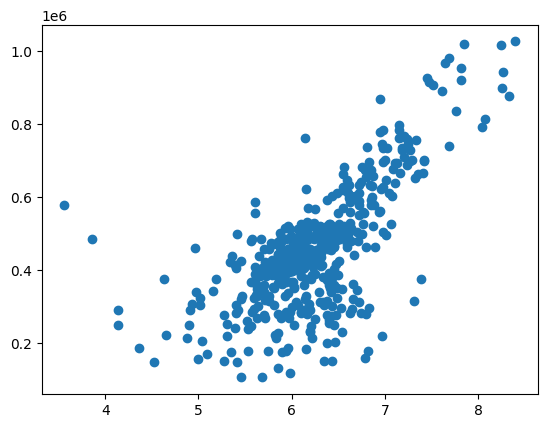

In [8]:
from sklearn.model_selection import train_test_split
plt.scatter(df['RM'],df['MEDV'])


In [9]:
# Define features and target variable
X = df.drop('MEDV', axis=1)  # Features
target = df["MEDV"]

'''
@:param random_state
The random_state is a seed for the random number generator,
it ensures that I will get the same output everytime I run this code
@:param test_size
test_size=0.2 means that I have the 80 percent of the data acting as training set
and 20 percent as testing set.
'''
X_train, X_test, y_train, y_test = train_test_split(X,target,test_size=0.2,random_state=101)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 2. **Initialize Parameters**: Linear regression model can be represented as `y = mx + c`, where `m` is the slope of the line (weight), `c` is the y-intercept (bias), and `y` is the dependent variable. We initialize `m` and `c` with some random values.


'''
we will choose w as weight and b as bias
'''
m = np.random.randn()
b = np.random.randn()

def hypothesis(x, m, b):
    return m*x + b

# 4. **Define Cost Function**: This function calculates the mean squared error between the predicted and actual values.

def cost(x, y, m, c):
    return ((y - hypothesis(x, m, c)) ** 2).mean()


# 5. **Define Gradient Descent Function**: This function updates the values of `m` and `c` by subtracting the derivatives of the cost function with respect to `m` and `c`.

def gradient_descent(x, y, m, c, learning_rate):
    dm = -2 * (x * (y - hypothesis(x, m, c))).mean()
    dc = -2 * (y - hypothesis(x, m, c)).mean()
    m = m - learning_rate * dm
    c = c - learning_rate * dc
    return m, c

# 
# 6. **Train the Model**: This function uses gradient descent to update `m` and `c` for a certain number of iterations.

def train(x, y, m, c, learning_rate, iterations):
    for i in range(iterations):
        m,c = gradient_descent(x,y,m,c,learning_rate)
        if i % 1000 == 0: # print cost every 1000 iterations
            print(f'Cost: {cost(x,y,m,c)}')
    return m,c

'''7. **Test the Model**: Use your trained model to make predictions on unseen data.
python'''
def predict(x_test, m, c):
    return hypothesis(x_test, m, c)

'''Remember to replace `x`, `y`, `learning_rate`, and `iterations` with your actual data and hyperparameters when calling the train function. Also note that this is a very basic implementation of linear regression and might not work well on complex datasets or those that require feature scaling or normalization.'''


In [10]:
linearR = LinearRegression()
#TODO: making a linear regression model myself

In [11]:
'''
The fit method is used for training data from the training dataset
@:parameter X_train
X_train is the x set of values that are being split from the set of feature values from X
@:parameter y_train contains the corresponding test values from y
'''
linearR.fit(X_train, y_train)

LinearRegression()

In [12]:
y_predic = linearR.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, y_predic)
mae = mean_absolute_error(y_test, y_predic)
r2 = r2_score(y_test, y_predic)

print(f'MSE: {mse}, MAE: {mae}, R^2: {r2}')

# 4. Interpretation
coefficients = linearR.coef_
print(f'Coefficients: {coefficients}')

MSE: 8589286526.085741, MAE: 69250.34632740814, R^2: 0.7252223767076543
Coefficients: [ 80737.51094651 -10992.92274351 -19126.49414973]


MSE is the average squared difference between the predicted and actual values. MAE is also the average absolute difference between the predicted and actual values. However, in this model, both the MSE and the MAE are large which means that there is a huge difference between the predicted and the actual values, which is not good.
According to the R^2 value, we have 72.5% of dependent variable is predictable from the independent variable


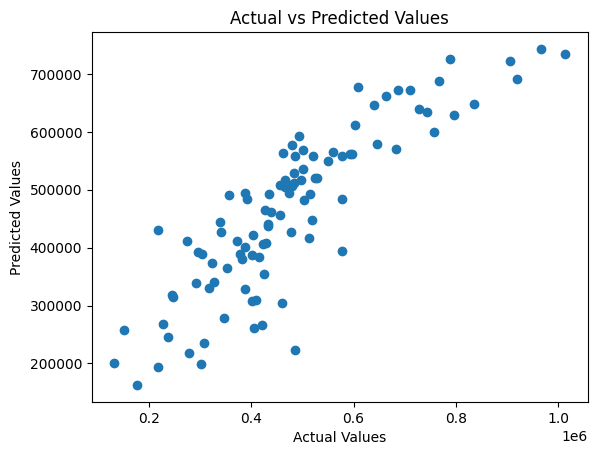

In [14]:
plt.scatter(y_test, y_predic)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


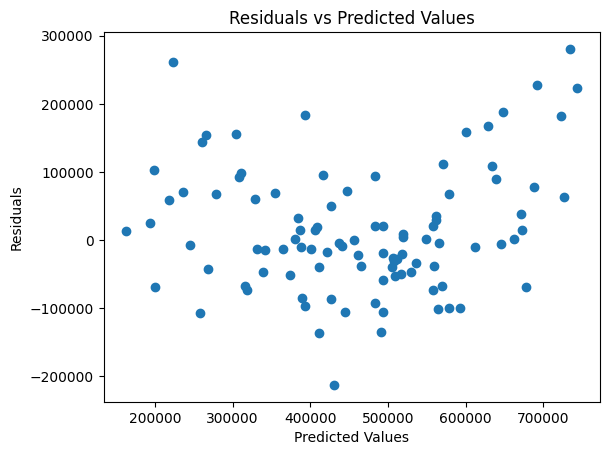

In [15]:
residuals = y_test - y_predic
plt.scatter(y_predic, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

According to the COMP551 chatbot, "a residual plot is a graphical representation of the differences between the actual values and the predicted values (residuals) of the dependent variable"

In this case, we can conservatively say that the data points are generally scattered randomly with some U-shape pattern and some outliers.The U-shape pattern may signify that another kind of regression model maybe a better fit of this data. Outliers may affect the regression model, but the outliers in this case is not significant enough, so treatment may not be needed. 
